In [100]:
# pip install m2cgen

In [101]:
# Key Name	Description
# Loan_ID	Unique Loan ID
# Gender	Male/ Female
# Married	Applicant married (Y/N)
# Dependents	Number of dependents
# Education	Applicant Education (Graduate/ Under Graduate)
# Self_Employed	Self-employed (Y/N)
# ApplicantIncome	Applicant income
# CoapplicantIncome	Coapplicant income
# LoanAmount	Loan amount in thousands
# Loan_Amount_Term	Term of a loan in months
# Credit_History	credit history meets guidelines
# Property_Area	Urban/ Semi-Urban/ Rural
# Loan_Status	Loan approved (Y/N)

ERROR! Session/line number was not unique in database. History logging moved to new session 1718


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the data

In [103]:
df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [104]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [105]:
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

## Number of numeric and categorical variables

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Checking for null values

In [107]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [108]:
df.drop("Loan_ID", axis = 1, inplace = True)

In [109]:
df.head(100)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
96,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y
97,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y
98,Male,Yes,0,Not Graduate,No,4188,0.0,115.0,180.0,1.0,Semiurban,Y


## Filling the missing values

In [110]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)

In [111]:
df.isnull().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [112]:
df["Married"].fillna(df["Married"].mode()[0], inplace = True)

In [113]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [114]:
df.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [116]:
df["Dependents"].head()

0    0
1    1
2    0
3    0
4    0
Name: Dependents, dtype: object

In [117]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [118]:
df["Dependents"] = df["Dependents"].replace("3+", 3)

In [119]:
df["Dependents"].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [120]:
df["Dependents"].fillna(0, inplace = True)

In [121]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [123]:
df["Dependents"] = df["Dependents"].astype(int)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.3+ KB


In [125]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [126]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [127]:
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace = True)

In [128]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [129]:
df["LoanAmount"].head()

0      NaN
1    128.0
2     66.0
3    120.0
4    141.0
Name: LoanAmount, dtype: float64

<Axes: >

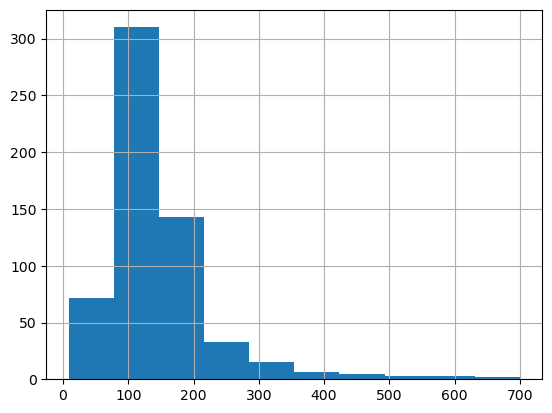

In [130]:
df["LoanAmount"].hist()

In [131]:
df["LoanAmount"].fillna(df["LoanAmount"].median(), inplace = True)

In [132]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [133]:
df["Loan_Amount_Term"].head()

0    360.0
1    360.0
2    360.0
3    360.0
4    360.0
Name: Loan_Amount_Term, dtype: float64

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.3+ KB


<Axes: >

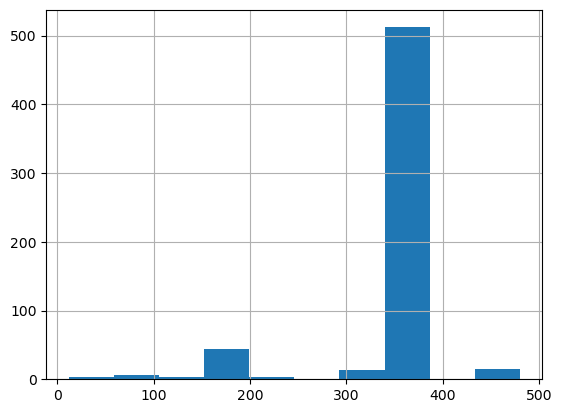

In [135]:
df["Loan_Amount_Term"].hist()

In [136]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [137]:
# Since it is a discrete variable hence we will fill the null values with the mode of this particular column

In [138]:
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace = True)

In [139]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.3+ KB


In [141]:
df["Credit_History"].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Credit_History, dtype: float64

In [142]:
df["Credit_History"].fillna(1, inplace = True)

## Checking the correlated features

<Axes: >

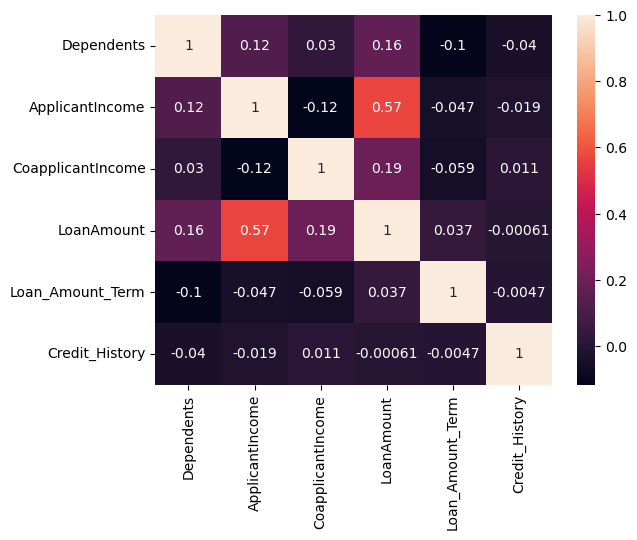

In [143]:
sns.heatmap(df.corr(), annot = True)

## Encoding the categorical columns

In [144]:
one_hot_columns = ["Gender", "Married", "Self_Employed"]
label_encode_columns = ["Education", "Property_Area"]

In [145]:
from sklearn.preprocessing import OneHotEncoder
enc_gender = OneHotEncoder(drop="if_binary")
enc_married = OneHotEncoder(drop="if_binary")
enc_emp = OneHotEncoder(drop="if_binary")

In [146]:
df["Gender"] = enc_gender.fit_transform(df["Gender"].values.reshape(-1, 1)).todense()
df["Married"] = enc_married.fit_transform(df["Married"].values.reshape(-1, 1)).todense()
df["Self_Employed"] = enc_emp.fit_transform(df["Self_Employed"].values.reshape(-1, 1)).todense()

In [147]:
# df["Gender"].values.reshape(-1, 1)

In [148]:
# Saving the one hot encoder
import pickle
pickle.dump(enc_gender,open("enc_gender.obj","wb"))
pickle.dump(enc_married,open("enc_married.obj","wb"))
pickle.dump(enc_emp,open("enc_emp.obj","wb"))

In [149]:
enc_gender.categories_

[array(['Female', 'Male'], dtype=object)]

In [150]:
df["Gender"]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    0.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Gender, Length: 614, dtype: float64

In [151]:
enc_gender.categories_

[array(['Female', 'Male'], dtype=object)]

In [152]:
# df["Gender"] = enc_gender.transform(df["Gender"])
# df["Married"] = enc_married.transform(df["Married"])
# df["Self_Employed"] = enc_emp.transform(df["Self_Employed"])

In [153]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,Graduate,0.0,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1.0,1.0,1,Graduate,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,1.0,0,Graduate,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,1.0,0,Not Graduate,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,0.0,0,Graduate,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [821]:
# # # Saving the one hot encoder
# import pickle
# pickle.dump(enc_gender,open("enc_gender.obj","wb"))
# pickle.dump(enc_married,open("enc_married.obj","wb"))
# pickle.dump(enc_emp,open("enc_emp.obj","wb"))

In [758]:
# load the one hot encoder
# enc = pickle.load(open("enc.obj", "rb"))
# enc.tranform(data)

## LabelEncoding the ordinal variables

In [759]:
from sklearn.preprocessing import LabelEncoder
le_edu = LabelEncoder()
le_prop = LabelEncoder()

In [760]:
le_edu.fit_transform(df["Education"])
le_prop.fit_transform(df["Property_Area"])

array([2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1,
       2, 1, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2,
       1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0,
       0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 2,
       2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0,
       1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2,

In [761]:
le_edu.classes_, le_prop.classes_

(array(['Graduate', 'Not Graduate'], dtype=object),
 array(['Rural', 'Semiurban', 'Urban'], dtype=object))

In [762]:
# ?LabelEncoder

In [763]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(7), int32(1), int64(1), object(3)
memory usage: 55.3+ KB


In [764]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [765]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,Graduate,0.0,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1.0,1.0,1,Graduate,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,1.0,0,Graduate,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,1.0,0,Not Graduate,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,0.0,0,Graduate,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [767]:
# # Saving the label encoder
import pickle
pickle.dump(le_edu,open("le_edu.obj","wb"))
pickle.dump(le_prop,open("le_prop.obj","wb"))

In [526]:
# load the label encoder
# le = pickle.load(open("le.obj",'rb'))

## Checking and removing the outliers

In [527]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0,0.0,5849,0.0,128.0,360.0,1.0,2,Y
1,1.0,1.0,1,0,0.0,4583,1508.0,128.0,360.0,1.0,0,N
2,1.0,1.0,0,0,1.0,3000,0.0,66.0,360.0,1.0,2,Y
3,1.0,1.0,0,1,0.0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1.0,0.0,0,0,0.0,6000,0.0,141.0,360.0,1.0,2,Y


## Applicant Income

<Axes: >

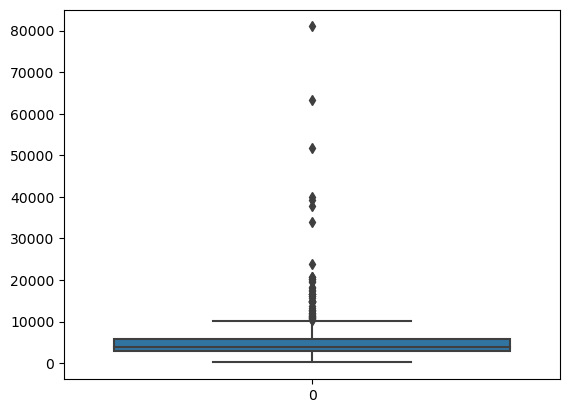

In [528]:
sns.boxplot(df["ApplicantIncome"])

In [529]:
df["ApplicantIncome"].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [530]:
# Finding quartiles
q1 = np.percentile(df["ApplicantIncome"], 25)
q2 = np.percentile(df["ApplicantIncome"], 50)
q3 = np.percentile(df["ApplicantIncome"], 75)
q1, q2, q3

(2877.5, 3812.5, 5795.0)

In [531]:
iqr = q3 - q1
ub = q3 + (1.5*iqr)
lb = q1 - (1.5*iqr)

In [532]:
ub, lb

(10171.25, -1498.75)

In [533]:
df = df[df["ApplicantIncome"] < ub]

In [534]:
df.shape

(564, 12)

<Axes: >

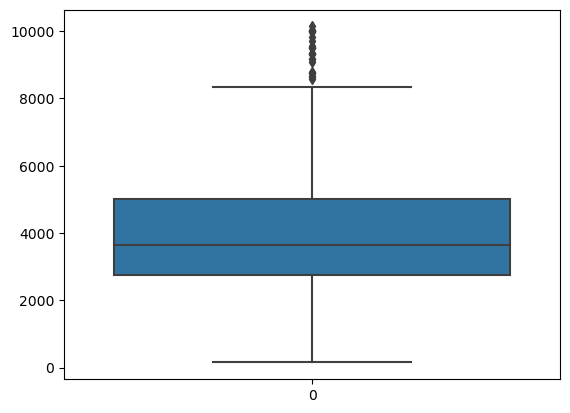

In [535]:
sns.boxplot(df["ApplicantIncome"])

In [536]:
# sns.boxplot(df["ApplicantIncome"])
df["ApplicantIncome"].describe()

count      564.000000
mean      4124.723404
std       1926.989806
min        150.000000
25%       2744.000000
50%       3638.500000
75%       5010.500000
max      10139.000000
Name: ApplicantIncome, dtype: float64

In [537]:
df.reset_index(inplace = True)

## Coapplicant Income

<Axes: >

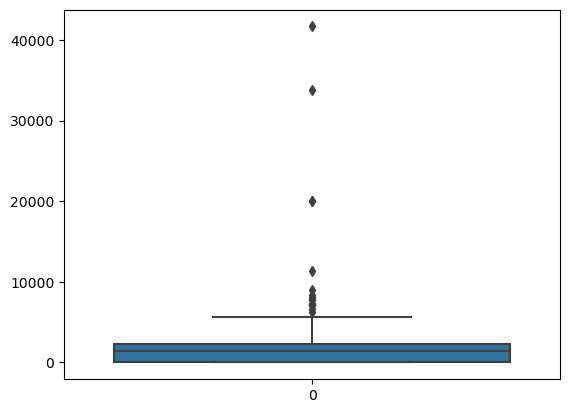

In [538]:
sns.boxplot(df["CoapplicantIncome"])

In [539]:
# Finding quartiles
q1 = np.percentile(df["CoapplicantIncome"], 25)
q2 = np.percentile(df["CoapplicantIncome"], 50)
q3 = np.percentile(df["CoapplicantIncome"], 75)
q1, q2, q3

(0.0, 1405.5, 2337.0)

In [540]:
iqr = q3 - q1
ub = q3 + (1.5*iqr)
lb = q1 - (1.5*iqr)

In [541]:
ub, lb

(5842.5, -3505.5)

In [542]:
df = df[df["CoapplicantIncome"] < ub]

In [543]:
df['CoapplicantIncome'].describe()

count     548.000000
mean     1359.425036
std      1458.228533
min         0.000000
25%         0.000000
50%      1293.500000
75%      2250.000000
max      5701.000000
Name: CoapplicantIncome, dtype: float64

In [544]:
df[df['CoapplicantIncome'] == 0.0]

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1.0,0.0,0,0,0.0,5849,0.0,128.0,360.0,1.0,2,Y
2,2,1.0,1.0,0,0,1.0,3000,0.0,66.0,360.0,1.0,2,Y
4,4,1.0,0.0,0,0,0.0,6000,0.0,141.0,360.0,1.0,2,Y
14,15,1.0,0.0,0,0,0.0,4950,0.0,125.0,360.0,1.0,2,Y
15,16,1.0,0.0,1,1,0.0,3596,0.0,100.0,240.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,602,1.0,1.0,3,0,0.0,5703,0.0,128.0,360.0,1.0,2,Y
559,609,0.0,0.0,0,0,0.0,2900,0.0,71.0,360.0,1.0,0,Y
560,610,1.0,1.0,3,0,0.0,4106,0.0,40.0,180.0,1.0,0,Y
562,612,1.0,1.0,2,0,0.0,7583,0.0,187.0,360.0,1.0,2,Y


In [545]:
# sns.boxplot(df["CoapplicantIncome"])
df["CoapplicantIncome"]

0         0.0
1      1508.0
2         0.0
3      2358.0
4         0.0
        ...  
559       0.0
560       0.0
561     240.0
562       0.0
563       0.0
Name: CoapplicantIncome, Length: 548, dtype: float64

##### 

<Axes: >

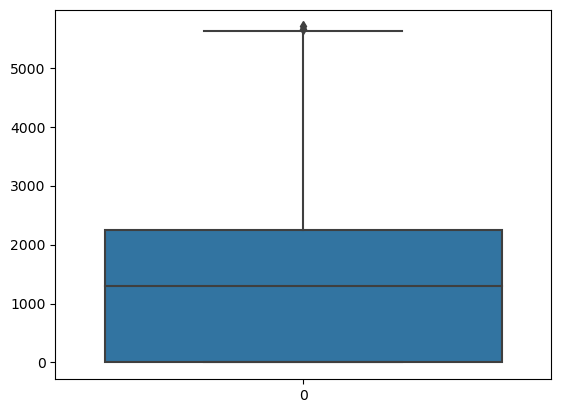

In [546]:
sns.boxplot(df["CoapplicantIncome"])

## Loan Amount

<Axes: >

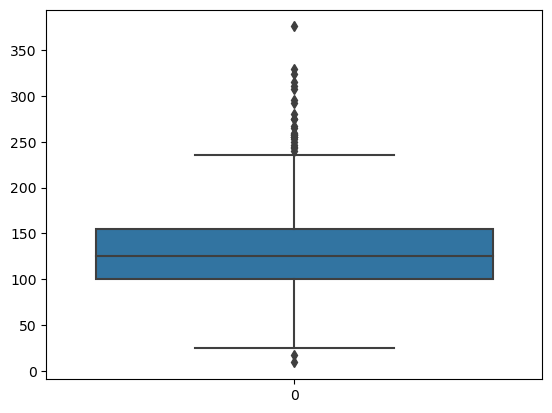

In [547]:
sns.boxplot(df["LoanAmount"])

In [548]:
# Finding quartiles
q1 = np.percentile(df["LoanAmount"], 25)
q2 = np.percentile(df["LoanAmount"], 50)
q3 = np.percentile(df["LoanAmount"], 75)
print(q1, q2, q3)

iqr = q3 - q1
ub = q3 + (1.5*iqr)
lb = q1 - (1.5*iqr)

100.0 125.0 155.0


In [549]:
df = df[(df["LoanAmount"] > lb) & (df["LoanAmount"] < ub)]

In [550]:
df.shape

(520, 13)

In [551]:
df.head()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1.0,0.0,0,0,0.0,5849,0.0,128.0,360.0,1.0,2,Y
1,1,1.0,1.0,1,0,0.0,4583,1508.0,128.0,360.0,1.0,0,N
2,2,1.0,1.0,0,0,1.0,3000,0.0,66.0,360.0,1.0,2,Y
3,3,1.0,1.0,0,1,0.0,2583,2358.0,120.0,360.0,1.0,2,Y
4,4,1.0,0.0,0,0,0.0,6000,0.0,141.0,360.0,1.0,2,Y


In [552]:
df.reset_index(inplace=True)

In [553]:
df.drop(["level_0", "index"], axis = 1, inplace = True)

In [554]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0,0.0,5849,0.0,128.0,360.0,1.0,2,Y
1,1.0,1.0,1,0,0.0,4583,1508.0,128.0,360.0,1.0,0,N
2,1.0,1.0,0,0,1.0,3000,0.0,66.0,360.0,1.0,2,Y
3,1.0,1.0,0,1,0.0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1.0,0.0,0,0,0.0,6000,0.0,141.0,360.0,1.0,2,Y


In [555]:
df["Loan_Amount_Term"].describe()

count    520.000000
mean     342.576923
std       65.618547
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

## Split the data into training and testing data

In [556]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             520 non-null    float64
 1   Married            520 non-null    float64
 2   Dependents         520 non-null    int32  
 3   Education          520 non-null    int32  
 4   Self_Employed      520 non-null    float64
 5   ApplicantIncome    520 non-null    int64  
 6   CoapplicantIncome  520 non-null    float64
 7   LoanAmount         520 non-null    float64
 8   Loan_Amount_Term   520 non-null    float64
 9   Credit_History     520 non-null    float64
 10  Property_Area      520 non-null    int32  
 11  Loan_Status        520 non-null    object 
dtypes: float64(7), int32(3), int64(1), object(1)
memory usage: 42.8+ KB


In [557]:
df["Loan_Status"] = df["Loan_Status"].replace('Y', 1)
df["Loan_Status"] = df["Loan_Status"].replace('N', 0)

In [558]:
X = df.drop("Loan_Status", axis = 1)
y = df["Loan_Status"]

In [559]:
X.ApplicantIncome.describe()

count      520.000000
mean      3995.719231
std       1794.687196
min        150.000000
25%       2724.500000
50%       3590.500000
75%       4772.750000
max      10047.000000
Name: ApplicantIncome, dtype: float64

In [560]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0,0,0.0,5849,0.0,128.0,360.0,1.0,2
1,1.0,1.0,1,0,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0,0,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0,1,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0,0,0.0,6000,0.0,141.0,360.0,1.0,2


In [561]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [563]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [562]:
df["Loan_Amount_Term"].unique()

array([360., 240., 180.,  60., 300., 480., 120.,  36.,  84.,  12.])

In [351]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22, stratify=y)

## Scaling the data

In [352]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [353]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [364]:
# # Saving the standard scaler
# from joblib import dump, load
# dump(scaler, 'std_scaler.bin', compress=True)

['std_scaler.bin']

In [365]:
# load the standard scaler
# scaler = load("std_scaler.bin")

## Model Building

In [354]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [355]:
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [356]:
lr.score(X_train_scaled, y_train)

0.8307692307692308

In [357]:
lr.score(X_test_scaled, y_test)

0.8

In [358]:
y_pred = lr.predict(X_test_scaled)

In [359]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.38      0.54        40
           1       0.78      0.99      0.87        90

    accuracy                           0.80       130
   macro avg       0.86      0.68      0.70       130
weighted avg       0.83      0.80      0.77       130



## Save the model into pickle format

In [360]:
import pickle
pickle.dump(lr, open('model.pkl', 'wb'))

In [361]:
# load the pickle model
# pickled_model = pickle.load(open('model.pkl', 'rb'))
# pickled_model.predict(X_test)